# Microbenchmarking
This notebook maintains the results of our CS 6354 final course project on microbenchmarking a CPU.

## Timing Overhead and Empty Function Call Overhead


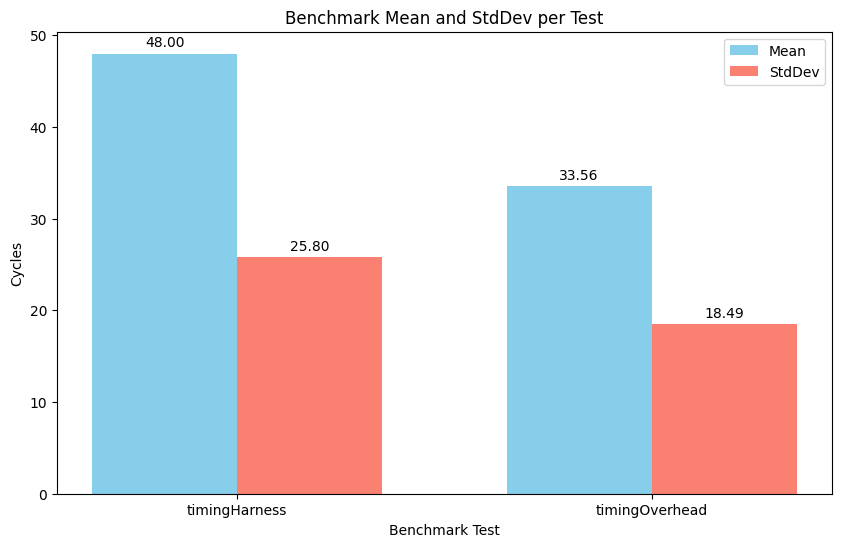

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../src/results.csv")

# Group by test name and compute average Mean and StdDev per test
summary = df.groupby('TestName')[['Mean', 'StdDev']].mean().reset_index()

# Set positions and width for bars
x = np.arange(len(summary['TestName']))  # positions for each test
width = 0.35  # width of each bar

# Create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Plot Mean bars
bars_mean = ax.bar(x - width/2, summary['Mean'], width, label='Mean', color='skyblue')

# Plot StdDev bars
bars_sd = ax.bar(x + width/2, summary['StdDev'], width, label='StdDev', color='salmon')

# Labels and title
ax.set_xlabel('Benchmark Test')
ax.set_ylabel('Cycles')
ax.set_title('Benchmark Mean and StdDev per Test')
ax.set_xticks(x)
ax.set_xticklabels(summary['TestName'])
ax.legend()

# Optional: annotate bars with values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),  # offset text slightly above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_mean)
autolabel(bars_sd)

plt.show()